In [17]:
import sys
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import matplotlib.pyplot as plt
from PySide6.QtWidgets import QApplication
from temgymbasic.gui import TemGymWindow

import numpy as np
from temgymbasic.utils import calculate_phi_0
from temgymbasic import gbd

from typing import Tuple, NamedTuple
from temgymbasic.plotting import plot_model
# %matplotlib ipympl

In [18]:
n_rays = 1
wavelength = 0.001
k = 2 * np.pi / wavelength
pupil_radius = 0.0

wavelengths = np.full(n_rays, wavelength)

object_plane = 0.0
lens_plane = 0.3
image_plane = 1.0
focal_length = 0.2

size = 256
det_shape = (size, size)
pixel_size = 0.5 / size
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

theta_x = 5
theta_y = 0

deg_yx = np.deg2rad((theta_y, theta_x ))
tilt_yx = np.tan(deg_yx)

wo = wavelength * 10

wos = np.full(n_rays, wo)

div = wavelength / (np.pi * wo)

dPx = wo
dPy = wo
dHx = div
dHy = div

z_r = (np.pi * wo ** 2) / wavelengths

coeffs = [0, 0, 0, 0, 0]

z = lens_plane
z1 = lens_plane
z2 = image_plane - lens_plane


z2

0.7

In [19]:
components = (
    comp.GaussBeam(
        z=object_plane,
        voltage=calculate_phi_0(wavelength),
        radius=pupil_radius,
        wo=wo,
        tilt_yx=tilt_yx
    ),
    comp.PerfectLens(
        z = lens_plane,
        z1 = object_plane - lens_plane,
        z2 = image_plane - lens_plane,
        f = focal_length,
        name='Perfect Lens',
    ),
    comp.AccumulatingDetector(
        z=image_plane,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=1,
        interference='gauss',
    ),
)


In [25]:
model = Model(components)
# rays = tuple(model.run_iter(num_rays=n_rays, random = False))
# image = model.detector.get_image(rays[-1])


all_rays = tuple(model.run_iter(num_rays=n_rays))

#Insert the rays to the left of the lens into the tuple of all rays
all_rays = all_rays[:1] + (model.run_to_z(num_rays=n_rays, z=lens_plane),) + all_rays[1:]
xvals_lens_to_end = np.stack(tuple(r.x for r in all_rays[1:]), axis=0)
zvals_lens_to_end = np.asarray(tuple(r.z for r in all_rays[1:]))


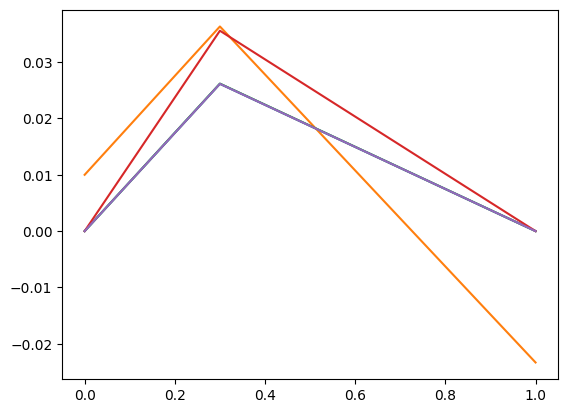

In [15]:
plt.figure()
plt.plot(zvals, xvals)

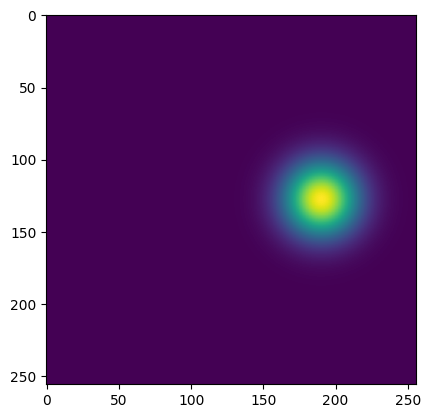

In [6]:
plt.figure()
plt.imshow(np.abs(image))

In [7]:
image = model.detector.get_image(rays[0])


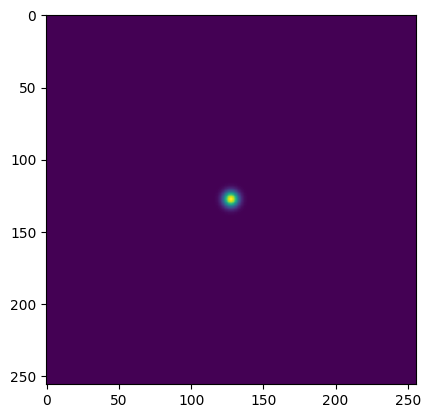

In [8]:
plt.figure()
plt.imshow(np.abs(image))

In [9]:
# AppWindow = QApplication(sys.argv)
# viewer = TemGymWindow(model)
# viewer.show()
# AppWindow.exec()


In [10]:
# model = Model(components)
# rays = tuple(model.run_iter(num_rays=5000))
# image = model.detector.get_image(rays)
# det_x = np.linspace(-det_shape[1]//2*pixel_size, det_shape[1]//2*pixel_size, det_shape[1])

# plt.figure()
# plt.imshow(image)